# 과제

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,
2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,
1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,

5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],

'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,

1047,965,943,958,971,949,884,866,876,822,704,719]}

df = pd.DataFrame(data)
print(df.head())

   year  month  interest_rate  unemployment_rate  index_price
0  2017     12           2.75                5.3         1464
1  2017     11           2.50                5.3         1394
2  2017     10           2.50                5.3         1357
3  2017      9           2.50                5.3         1293
4  2017      8           2.50                5.4         1256


## 데이터프레임의 두 컬럼의 선형 회귀와 다항 회귀를 분석하는 함수 생성

interest_rate vs index_price
coef : [574.45637584] intercept : -127.38255033557039
train data score: 0.8541859618501457
test data score: 0.9418923929450573


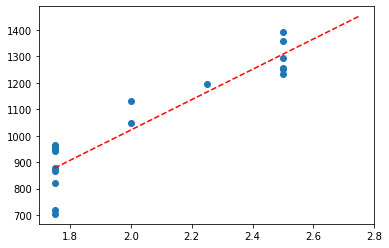

unemployment_rate vs index_price
coef : [-611.41330166] intercept : 4586.054631828979
train data score: 0.8748908875163574
test data score: 0.7074751133772279


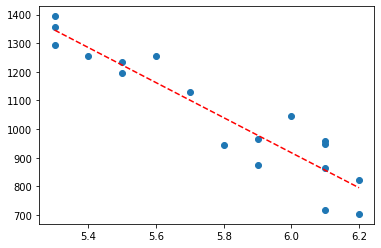

interest_rate vs index_price
coef : [2802.42473118 -524.84946237] intercept : -2429.10282258068
train data score: 0.8676269364555872
test data score: 0.794526521436731


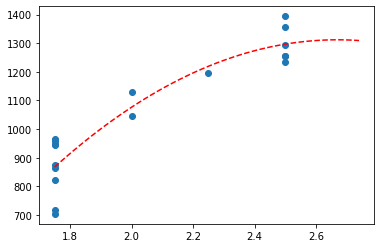

unemployment_rate vs index_price
coef : [-527.97932022   -7.26428138] intercept : 4347.248197109258
train data score: 0.8748971920999006
test data score: 0.7057073065929069


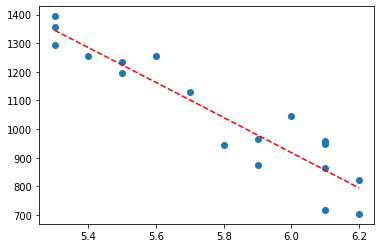

In [134]:
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')


def make_linear(col1, col2):
    # 샘플 생성
    from sklearn.model_selection import	train_test_split
    train_input,	test_input,	train_target,	test_target =	train_test_split(df[col1], df[col2],	random_state=42)
    # 전처리
    train_input = pd.DataFrame(train_input)
    test_input = pd.DataFrame(test_input)
    # 선형회귀 모델 훈련
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(train_input, train_target)
    print(f'coef : {lr.coef_}', f'intercept : {lr.intercept_}')
    print(f'train data score: {lr.score(train_input, train_target)}')
    print(f'test data score: {lr.score(test_input, test_target)}')
    # 그래프 그리기
    minv = min(df[col1]); maxv = max(df[col1])
    plt.scatter(train_input, train_target)
    plt.plot([minv, maxv], [minv*lr.coef_[0] + lr.intercept_, maxv*lr.coef_[0] + lr.intercept_], color='red', linestyle='--')
    plt.xlabel = col1
    plt.ylabel = col2
    plt.title = f'{col1}vs{col2}'
    plt.show()

def make_poly(col1, col2):
    # 샘플 생성
    from sklearn.model_selection import	train_test_split
    train_input,	test_input,	train_target,	test_target =	train_test_split(df[col1], df[col2],	random_state=42)
    # 전처리
    train_input = pd.DataFrame(train_input)
    test_input = pd.DataFrame(test_input)
    train_input[f'{col1}^2'] =train_input ** 2
    test_input[f'{col1}^2'] = test_input ** 2
    # 다항회귀 모델 훈련
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(train_input, train_target)
    print(f'coef : {lr.coef_}', f'intercept : {lr.intercept_}')
    print(f'train data score: {lr.score(train_input, train_target)}')
    print(f'test data score: {lr.score(test_input, test_target)}')
    # 그래프 그리기
    minv = min(df[col1]); maxv = max(df[col1])
    plt.scatter(train_input[f'{col1}'], train_target)
    yval = [lr.predict([[i, i**2]])[0] for i in np.arange(minv, maxv, 0.01)]
    plt.plot(np.arange(minv, maxv, 0.01), yval , color='red', linestyle='--')
    plt.xlabel = col1
    plt.ylabel = col2
    plt.title = f'{col1}vs{col2}'
    plt.show()

print('interest_rate vs index_price')
make_linear('interest_rate', 'index_price')

print('unemployment_rate vs index_price')
make_linear('unemployment_rate', 'index_price')

print('interest_rate vs index_price')
make_poly('interest_rate', 'index_price')

print('unemployment_rate vs index_price')
make_poly('unemployment_rate', 'index_price')

---------------------------------------
- 아래쪽은 함수 풀어서 쓴 곳

# 물가지수와 이자율 산점도 및 선형 회귀 분석

In [18]:
from	sklearn.model_selection import	train_test_split
train_input,	test_input,	train_target,	test_target =	train_test_split(df['interest_rate'], df['index_price'],	random_state=42)

train_input = pd.DataFrame(train_input)
test_input = pd.DataFrame(test_input)

## 선형회귀

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

print(lr.coef_[0], lr.intercept_)
print(f'train data score: {lr.score(train_input, train_target)}')
print(f'test data score: {lr.score(test_input, test_target)}')

574.4563758389262 -127.38255033557039
train data score: 0.8541859618501457
test data score: 0.9418923929450573


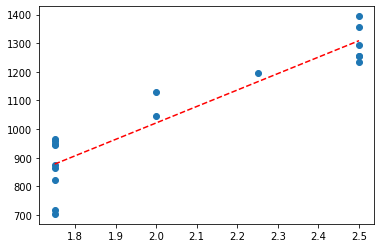

In [32]:
plt.scatter(train_input, train_target)
plt.plot([1.75, 2.5], [1.75*lr.coef_[0] + lr.intercept_, 2.5*lr.coef_[0] + lr.intercept_], color='red', linestyle='--')

plt.show()

## 다항회귀

In [60]:
test_input['interest_rate^2'] = test_input ** 2

In [ ]:
train_input['interest_rate^2'] =train_input ** 2

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.8676269364555872
0.794526521436731


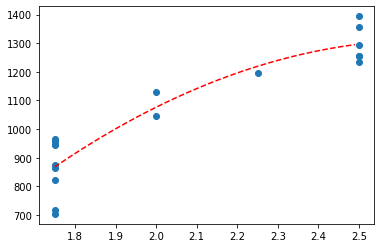

In [80]:
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

plt.scatter(train_input['interest_rate'], train_target)
yval = [lr.predict([[i, i**2]])[0] for i in np.arange(1.75, 2.5, 0.01)]
plt.plot(np.arange(1.75, 2.5, 0.01), yval , color='red', linestyle='--')

plt.show()